In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import random

In [ ]:
image_size = (128, 128)
class_names = ['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']
train_path = '/content/drive/MyDrive/IML LAB 2nd year/dataset/train'
validation_path = '/content/drive/MyDrive/IML LAB 2nd year/dataset/validation'


In [ ]:
def load_images_from_folder(base_path, class_names, image_size):
    images = []
    labels = []

    print(f"\nLoading images from: {base_path}")
    for class_name in class_names:
        class_path = os.path.join(base_path, class_name)
        count = 0

        for img_name in os.listdir(class_path):
            if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(class_path, img_name)
                try:
                    img = Image.open(img_path).convert('RGB')
                    img = img.resize(image_size)
                    img_array = np.array(img).flatten() / 255.0
                    images.append(img_array)
                    labels.append(class_name)
                    count += 1
                except Exception as e:
                    print(f"Couldn't process {img_path}: {e}")

        print(f"Loaded {count} images for class: {class_name}")

    return np.array(images), np.array(labels)


In [ ]:
X_train, y_train = load_images_from_folder(train_path, class_names, image_size)
X_test, y_test = load_images_from_folder(validation_path, class_names, image_size)



Loading images from: /content/drive/MyDrive/IML LAB 2nd year/dataset/train
Loaded 581 images for class: airplane
Loaded 774 images for class: car
Loaded 708 images for class: cat
Loaded 561 images for class: dog
Loaded 674 images for class: flower
Loaded 800 images for class: fruit
Loaded 630 images for class: motorbike
Loaded 788 images for class: person

Loading images from: /content/drive/MyDrive/IML LAB 2nd year/dataset/validation
Loaded 146 images for class: airplane
Loaded 194 images for class: car
Loaded 177 images for class: cat
Loaded 141 images for class: dog
Loaded 169 images for class: flower
Loaded 200 images for class: fruit
Loaded 158 images for class: motorbike
Loaded 198 images for class: person


In [ ]:
print("\nStandardizing the data...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Standardizing the data...


In [ ]:
# SVM
print("Training SVM...")
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, y_pred_svm)


Training SVM...


In [ ]:
# Logistic Regression
print("\nTraining Logistic Regression...")
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)






Training Logistic Regression...


In [ ]:
# KNN
print("Training KNN...")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, y_pred_knn)


Training KNN...


Logistic Regression Results:
              precision    recall  f1-score   support

    airplane       0.78      0.78      0.78       146
         car       0.77      0.77      0.77       194
         cat       0.47      0.55      0.51       177
         dog       0.42      0.34      0.38       141
      flower       0.66      0.57      0.61       169
       fruit       0.97      1.00      0.98       200
   motorbike       0.87      0.84      0.85       158
      person       0.90      0.98      0.94       198

    accuracy                           0.75      1383
   macro avg       0.73      0.73      0.73      1383
weighted avg       0.74      0.75      0.74      1383



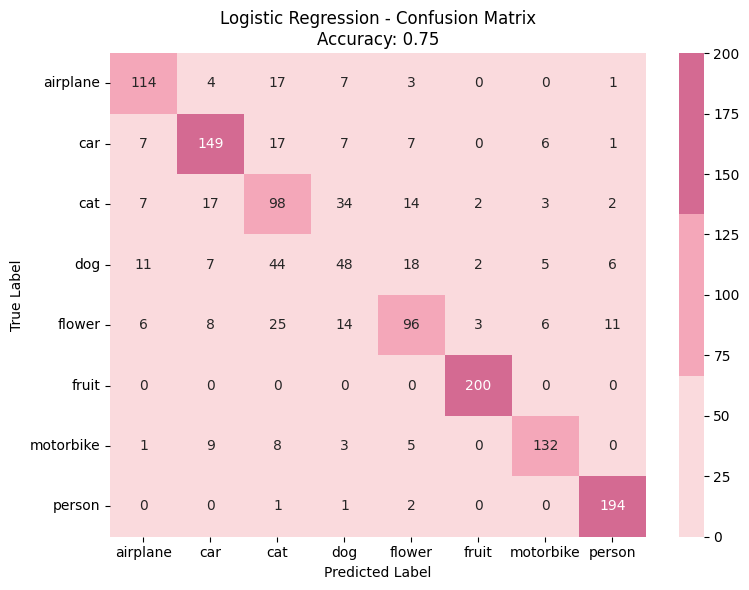

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

#Logistic Regression
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_logreg, target_names=class_names))

cm_logreg = confusion_matrix(y_test, y_pred_logreg)
acc_logreg = accuracy_score(y_test, y_pred_logreg)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap=sns.color_palette(['#FADADD', '#F4A7B9', '#D46A92']),
            xticklabels=class_names, yticklabels=class_names)
plt.title(f'Logistic Regression - Confusion Matrix\nAccuracy: {acc_logreg:.2f}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


SVM Results:
              precision    recall  f1-score   support

    airplane       0.75      0.84      0.79       146
         car       0.85      0.82      0.84       194
         cat       0.46      0.62      0.53       177
         dog       0.47      0.35      0.40       141
      flower       0.72      0.59      0.64       169
       fruit       1.00      1.00      1.00       200
   motorbike       0.95      0.85      0.90       158
      person       0.94      0.98      0.96       198

    accuracy                           0.77      1383
   macro avg       0.77      0.76      0.76      1383
weighted avg       0.78      0.77      0.77      1383



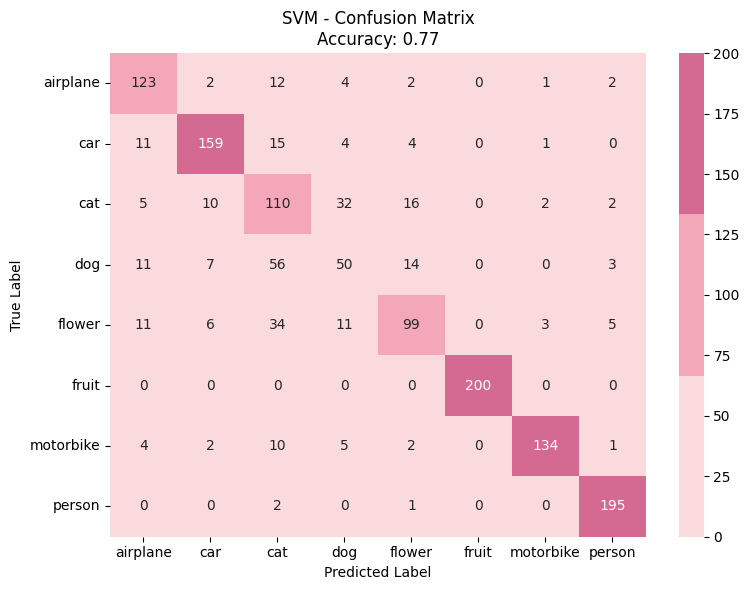

In [ ]:
# SVM
print("SVM Results:")
print(classification_report(y_test, y_pred_svm, target_names=class_names))

cm_svm = confusion_matrix(y_test, y_pred_svm)
acc_svm = accuracy_score(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap=sns.color_palette(['#FADADD', '#F4A7B9', '#D46A92']),
            xticklabels=class_names, yticklabels=class_names)
plt.title(f'SVM - Confusion Matrix\nAccuracy: {acc_svm:.2f}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


KNN Results:
              precision    recall  f1-score   support

    airplane       0.51      0.90      0.65       146
         car       0.89      0.39      0.54       194
         cat       0.33      0.85      0.48       177
         dog       0.38      0.11      0.17       141
      flower       0.82      0.24      0.37       169
       fruit       0.97      1.00      0.98       200
   motorbike       0.99      0.49      0.66       158
      person       0.83      0.88      0.86       198

    accuracy                           0.63      1383
   macro avg       0.71      0.61      0.59      1383
weighted avg       0.73      0.63      0.61      1383



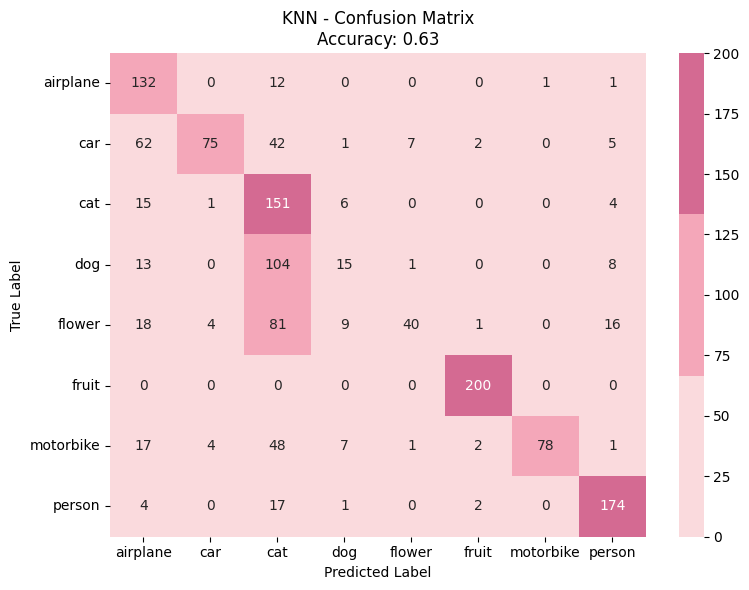

In [ ]:
# KNN
print("KNN Results:")
print(classification_report(y_test, y_pred_knn, target_names=class_names))

cm_knn = confusion_matrix(y_test, y_pred_knn)
acc_knn = accuracy_score(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap=sns.color_palette(['#FADADD', '#F4A7B9', '#D46A92']),
            xticklabels=class_names, yticklabels=class_names)
plt.title(f'KNN - Confusion Matrix\nAccuracy: {acc_knn:.2f}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()




Model Accuracy Comparison:
Logistic Regression: 0.75
SVM: 0.77
KNN: 0.63


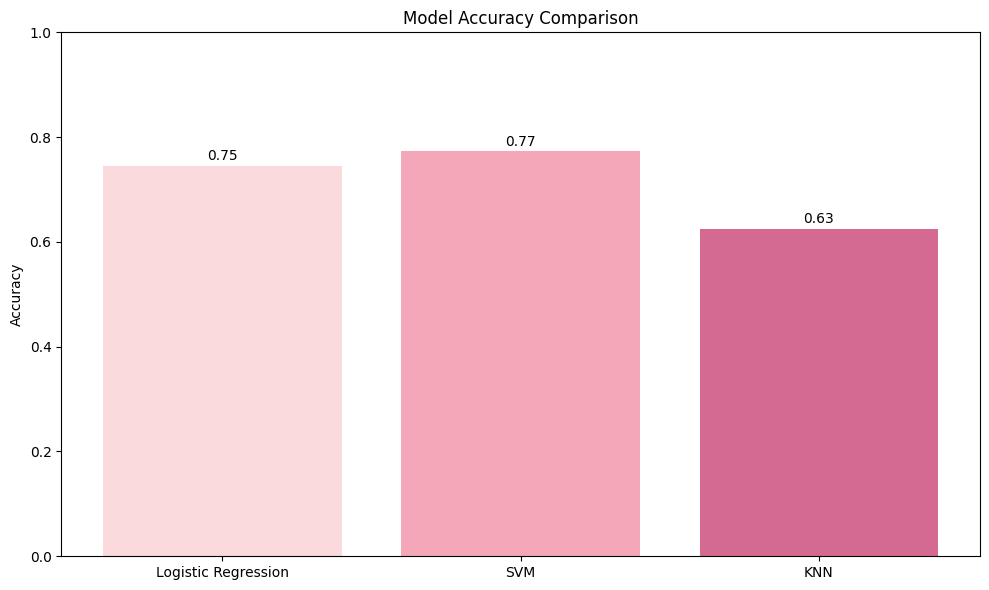

In [ ]:
print("\nModel Accuracy Comparison:")
accuracies = {
    'Logistic Regression': logreg_accuracy,
    'SVM': svm_accuracy,
    'KNN': knn_accuracy
}
for model, acc in accuracies.items():
    print(f"{model}: {acc:.2f}")

plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['#FADADD', '#F4A7B9', '#D46A92'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, (model, acc) in enumerate(accuracies.items()):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center')
plt.tight_layout()
plt.show()



Visualizing Sample Predictions...


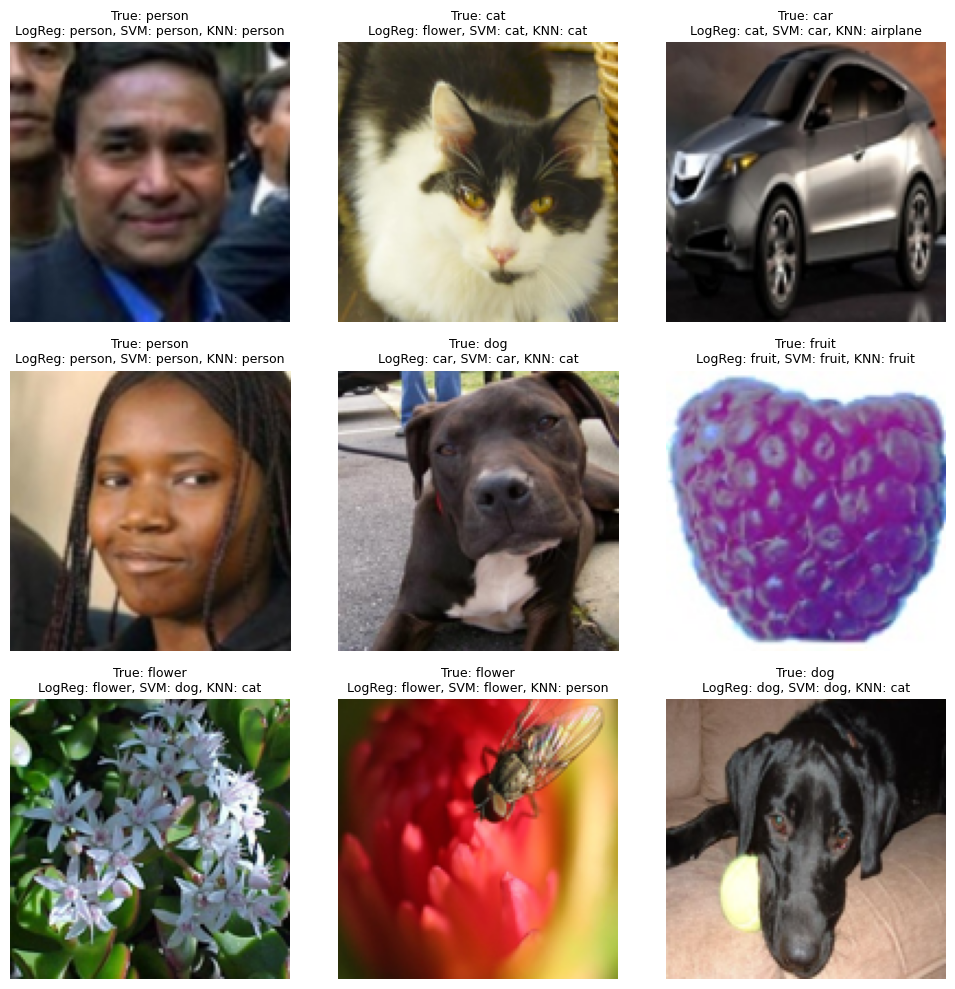

In [ ]:
print("\nVisualizing Sample Predictions...")

val_paths = []
for class_name in class_names:
    class_folder = os.path.join(validation_path, class_name)
    for img_name in os.listdir(class_folder):
        if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            val_paths.append(os.path.join(class_folder, img_name))

num_images = min(9, len(X_test))
random_indices = random.sample(range(len(X_test)), num_images)

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()

for i, idx in enumerate(random_indices):
    try:
        img = Image.open(val_paths[idx]).resize(image_size)
        axes[i].imshow(img)
        axes[i].axis('off')

        true_label = y_test[idx]
        pred_logreg = y_pred_logreg[idx]
        pred_svm = y_pred_svm[idx]
        pred_knn = y_pred_knn[idx]

        title = f"True: {true_label}\nLogReg: {pred_logreg}, SVM: {pred_svm}, KNN: {pred_knn}"
        axes[i].set_title(title, fontsize=9)

    except Exception as e:
        print(f"Error loading image {idx}: {e}")
        axes[i].axis('off')

plt.tight_layout()
plt.show()
